In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

1. global_active_power: The total active power consumed by the household (kilowatts).
2. global_reactive_power: The total reactive power consumed by the household (kilowatts).
3. voltage: Average voltage (volts).
4. global_intensity: Average current intensity (amps).
5. sub_metering_1: Active energy for kitchen (watt-hours of active energy).
6. sub_metering_2: Active energy for laundry (watt-hours of active energy).
7. sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

## We will try to solve the problem that, given we have data of previous consumption, what will be the consumption for next month?

In [2]:
data = pd.read_csv('household_power_consumption.txt',sep=';', parse_dates=[['Date','Time']])
data.head()

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# When we try to convert the columns to floats, we get errors as some values are marked as '?'.
# As a solution for this, we will replace the '?' values with nan.
data.replace('?',np.nan,inplace=True)

# Now once thats done, we convert the dataset to floats.
data['Global_active_power'] = data['Global_active_power'].astype('float32')
data['Global_reactive_power'] = data['Global_reactive_power'].astype('float32')
data['Voltage'] = data['Voltage'].astype('float32')
data['Global_intensity'] = data['Global_intensity'].astype('float32')
data['Sub_metering_1'] = data['Sub_metering_1'].astype('float32')
data['Sub_metering_2'] = data['Sub_metering_2'].astype('float32')
data['Sub_metering_3'] = data['Sub_metering_3'].astype('float32')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date_Time              datetime64[ns]
 1   Global_active_power    float32       
 2   Global_reactive_power  float32       
 3   Voltage                float32       
 4   Global_intensity       float32       
 5   Sub_metering_1         float32       
 6   Sub_metering_2         float32       
 7   Sub_metering_3         float32       
dtypes: datetime64[ns](1), float32(7)
memory usage: 71.2 MB


In [5]:
print('The missing values in each columns are as below:')
data.isna().sum()

The missing values in each columns are as below:


Date_Time                    0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
data[(data['Date_Time']=='16/12/2006 17:24:00')]

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0


In [7]:
data[(data['Date_Time']=='17/12/2006 17:24:00')]

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1440,2006-12-17 17:24:00,3.39,0.17,232.649994,14.6,0.0,0.0,17.0


In [8]:
# To fill the missing values we can copy the value at same time the day before.
data[data['Global_active_power'].isna()==True]

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1990185,2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,2010-09-28 19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have around 25979 values as missing values. We could choose to impute them before we train our model, or we can use LSTMs.

In [9]:
data['Date_Time'].min(), data['Date_Time'].max()

(Timestamp('2006-12-16 17:24:00'), Timestamp('2010-12-11 23:59:00'))

In [10]:
# to find the idx of rows where we have missing data, we will take the union of set of indexes of each column with missing value.
cols = data.drop('Date_Time',axis=1).columns
na_idx = set()
for col in cols:
    a = set(data[data[col].isna()==True].index)

    na_idx = na_idx.union(a)
    #print(na_idx)

len(na_idx)

25979

In [11]:
# We have data for every minute from year 2006 to 2010. We want to predict the energy consumption for next day.
# We will use MAE as our loss function to minimize.
# We will try to run this model with simple models as well as deep learning.
def data_impute(df):
    # For each row in data, check if any of col is nan, if yes then impute it with value of that col a day before.
    one_day = 24*60    # For each day we have 24 hrs and each hr we have 60 readings.
    cols = df.drop('Date_Time',axis=1).columns
    for row in tqdm(na_idx):
        for col_id,col in enumerate(cols):
            if np.isnan(df.iloc[row,col_id+1]):
                imputed_val = df.iloc[row-one_day,col_id+1]
                df.iloc[row,col_id+1] = imputed_val
    #print(df[df['Global_active_power'].isna()==True].index)
    return df

In [12]:
filled_data =  data_impute(data)

In [13]:
# EDA
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,8)

plt.style.use('dark_background')

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


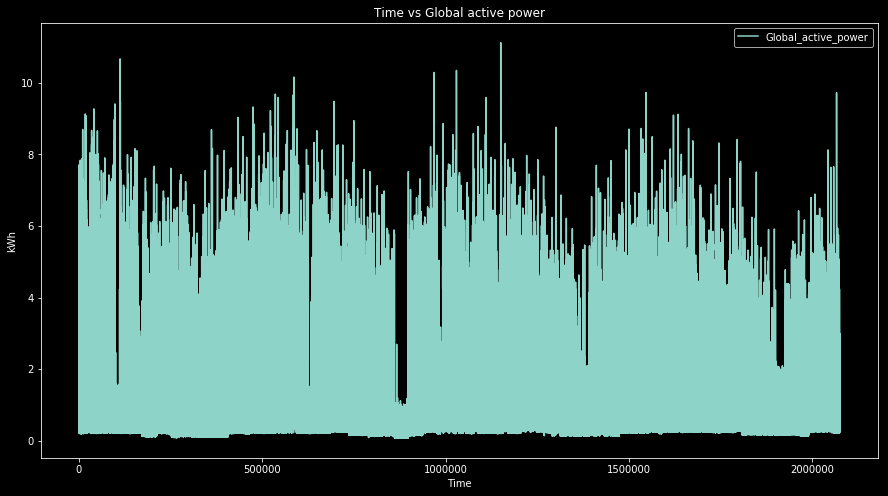

In [14]:
# Plotting the data, of energy for all years.
plt.plot(range(len(data)), filled_data['Global_active_power'],label='Global_active_power')
plt.xlabel('Time')
plt.ylabel('kWh')
plt.title('Time vs Global active power')
plt.legend()

range(505044, 527040)


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

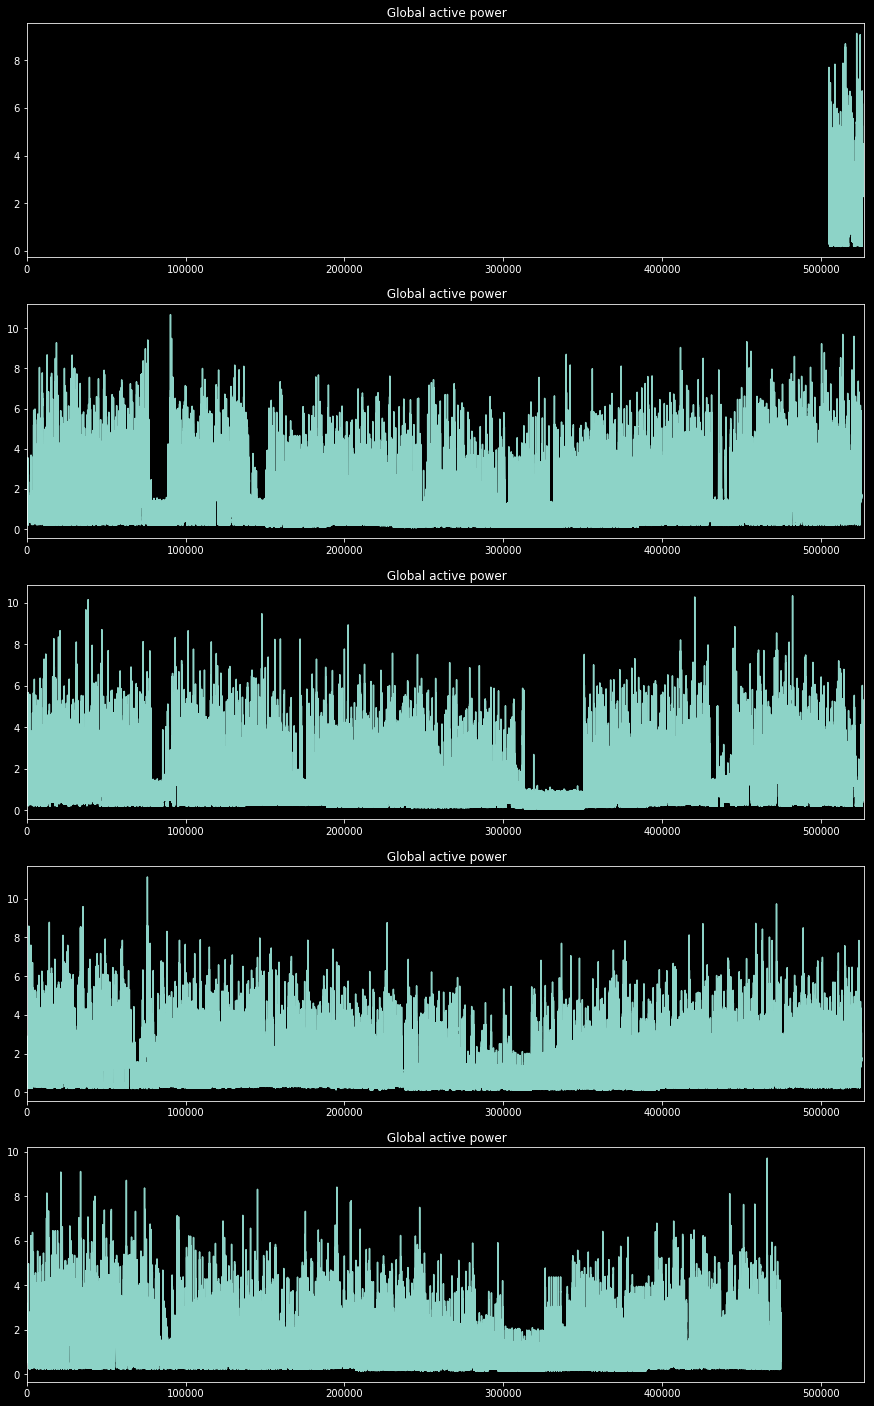

In [15]:
# plot graphs for each year.
years = filled_data['Date_Time'].dt.year.unique()
plt.figure(figsize=(15,25))
one_year = 60*24*366

for idx,year in enumerate(years):
    plt.subplot(5,1,idx+1)
    y = filled_data['Global_active_power'].loc[filled_data['Date_Time'].dt.year==year]

    if idx==0:
        x = range(one_year-len(y),one_year)
        print(x)
    else:
        x = range(len(y))
    plt.plot(x,y)
    plt.title(' Global active power')
    plt.xlim(right=one_year, left=0)

In [16]:
# we will see if plotting avg value for each day will lead to better insights about data.
filled_data['month'] = filled_data['Date_Time'].dt.month
filled_data['year'] = filled_data['Date_Time'].dt.year
filled_data['weekday'] = filled_data['Date_Time'].dt.weekday
filled_data['day'] = filled_data['Date_Time'].dt.day

We see that on an average, the consumption on weekends that is around Saturday and Sunday, the power consumption goes up compared to other days.

range(350, 366)


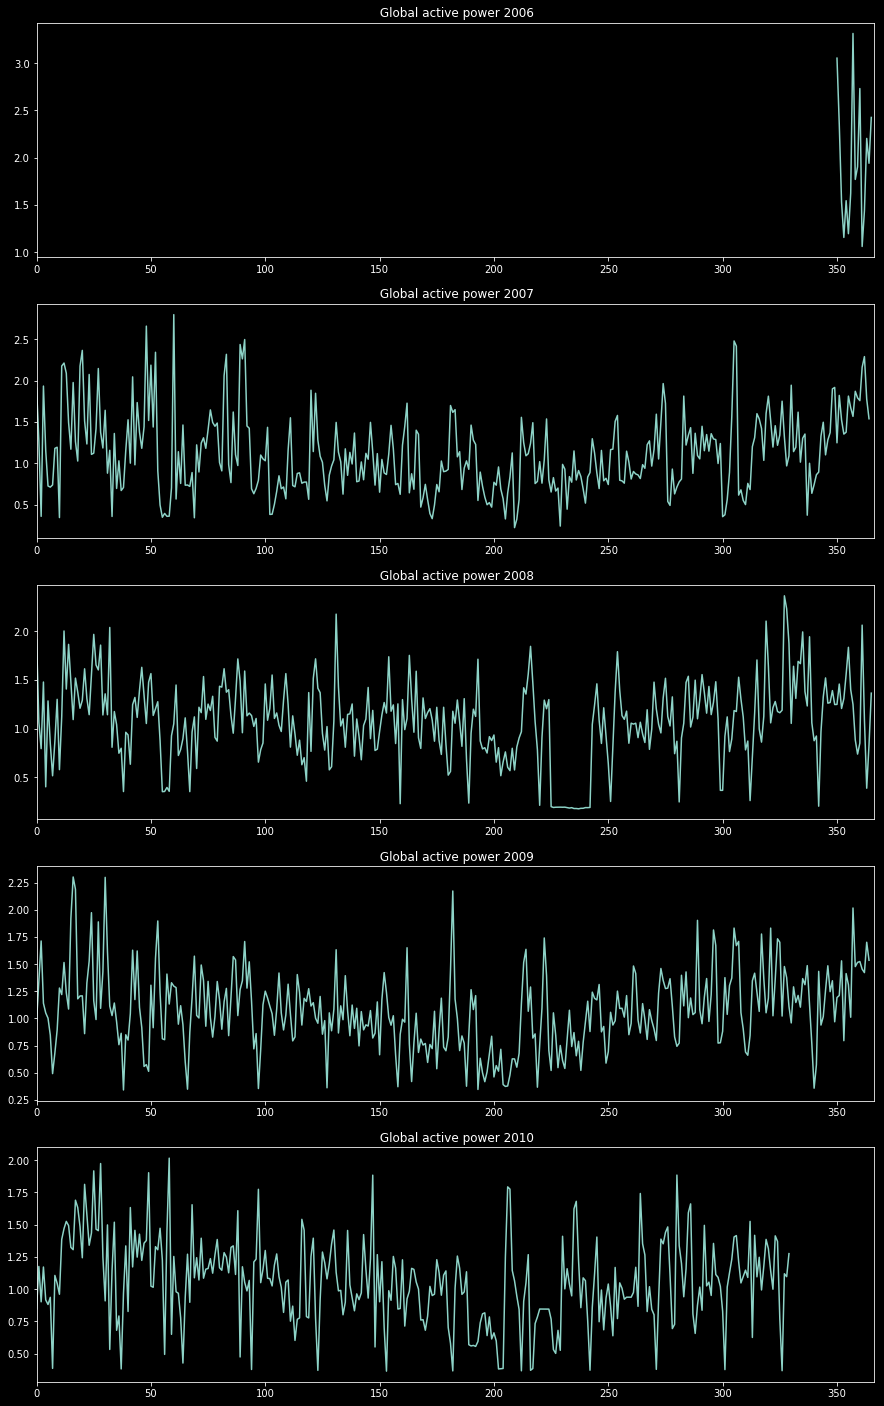

In [17]:
# plot graphs for each year grouped by day
years = filled_data['Date_Time'].dt.year.unique()
plt.figure(figsize=(15,25))
one_year = 366
test = filled_data.groupby(['year','month','day']).mean()

for idx,year in enumerate(years):
    plt.subplot(5,1,idx+1)
    y_data = test.loc[year]
    y = y_data['Global_active_power']

    if idx==0:
        x = range(one_year-len(y),one_year)
        print(x)
    else:
        x = range(len(y))
    plt.plot(x,y)
    plt.title(' Global active power '+str(year))
    plt.xlim(right=one_year, left=0)

range(11, 12)


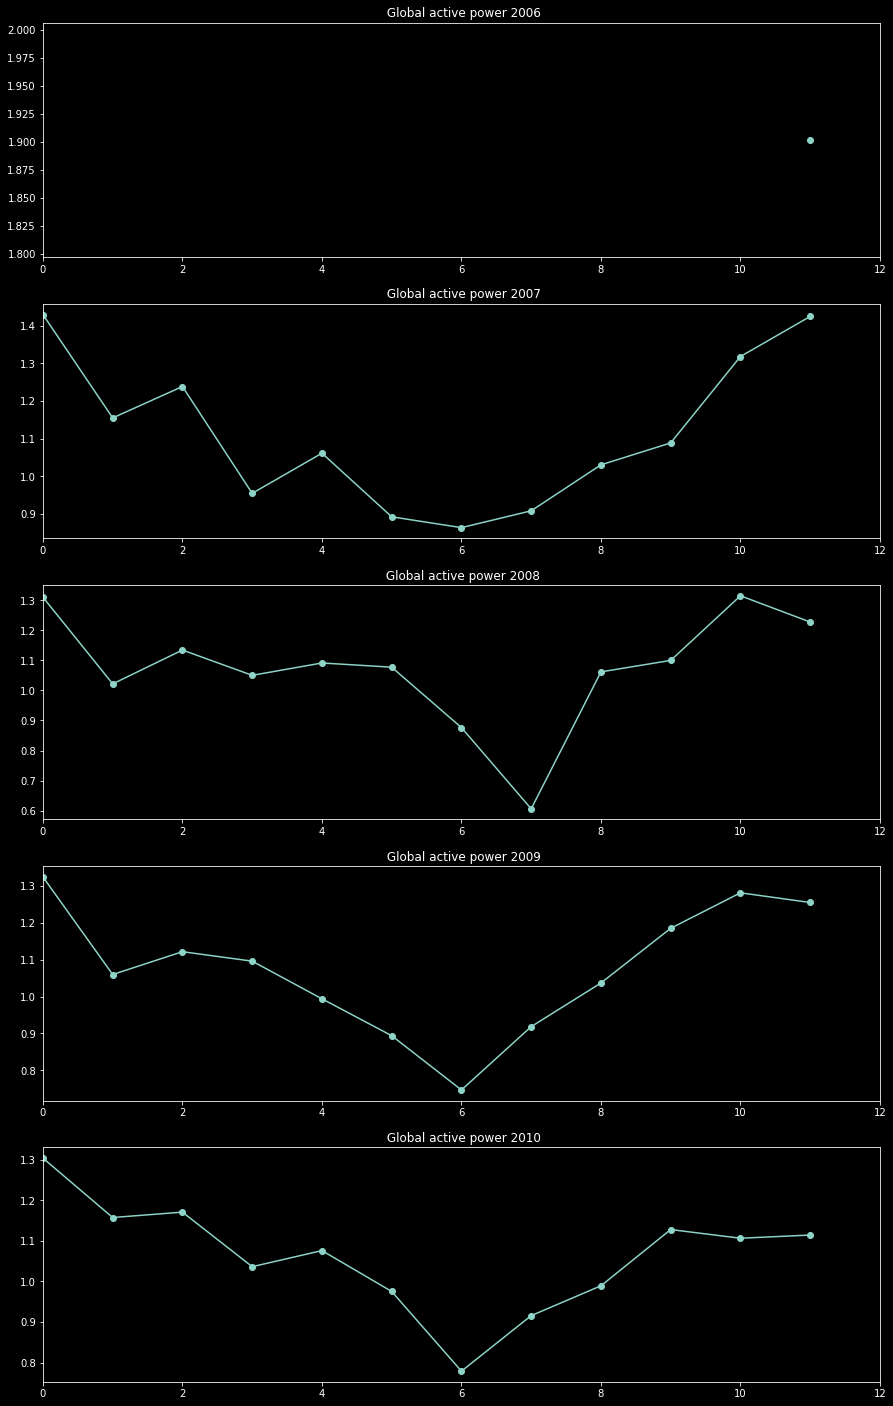

In [18]:
# plot graphs for each year grouped by month
years = filled_data['Date_Time'].dt.year.unique()
plt.figure(figsize=(15,25))
one_year = 12
test = filled_data.groupby(['year','month']).mean()

for idx,year in enumerate(years):
    plt.subplot(5,1,idx+1)
    y_data = test.loc[year]
    y = y_data['Global_active_power']

    if idx==0:
        x = range(one_year-len(y),one_year)
        print(x)
    else:
        x = range(len(y))
    plt.plot(x,y,'o-')
    plt.title(' Global active power '+str(year))
    plt.xlim(right=one_year, left=0)

From all the above plots we observe that there is a strong dip in consumption during the period of May till September.
Also in year 2008, the dip is very pronounced so we should take a look at that data. Data for year 2006 is only available for month of december, that too from 16th December so half a month. We will choose to drop that data.

In [19]:
#filled_data.drop(filled_data[filled_data['year']==2006].index,inplace=True)

In [20]:
#filled_data.set_index('Date_Time',inplace=True)

In [21]:
# Take values for each week instead of per minute each day.
# So we get the weekly consumption by summing all the values in same week.

filled_data['week_of_year'] = filled_data['Date_Time'].dt.isocalendar().week

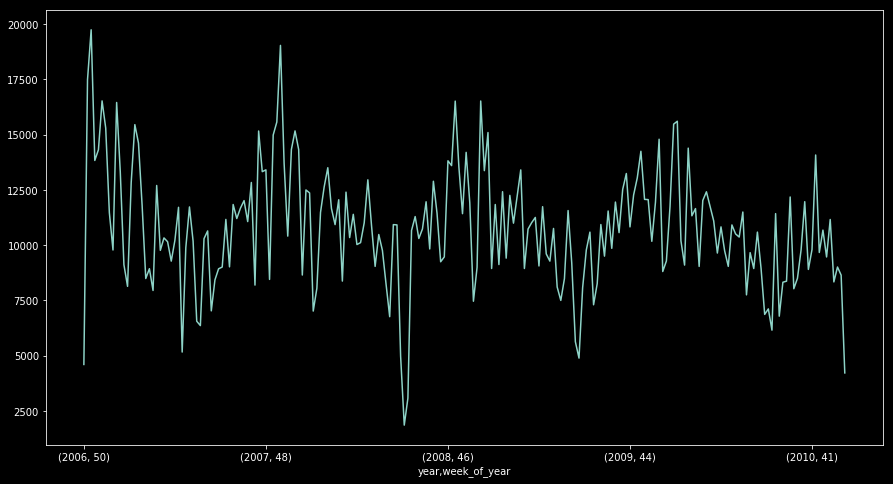

In [22]:
weekly_data = filled_data.groupby(['year','week_of_year']).sum()['Global_active_power']
weekly_data.plot()

We do see some seasonality in the data. If we remove that our data will becomme more stationary.

In [23]:
# Checking for stationary dataset.
from statsmodels.tsa.stattools import adfuller
result = adfuller(weekly_data)
print('The p value is: ', result[1])
if result[1]<=0.05:
    print('The null hypothesis is rejected. Our data is stationary.')
else:
    print('The data is non stationary.')

The p value is:  0.0033148719905113145
The null hypothesis is rejected. Our data is stationary.


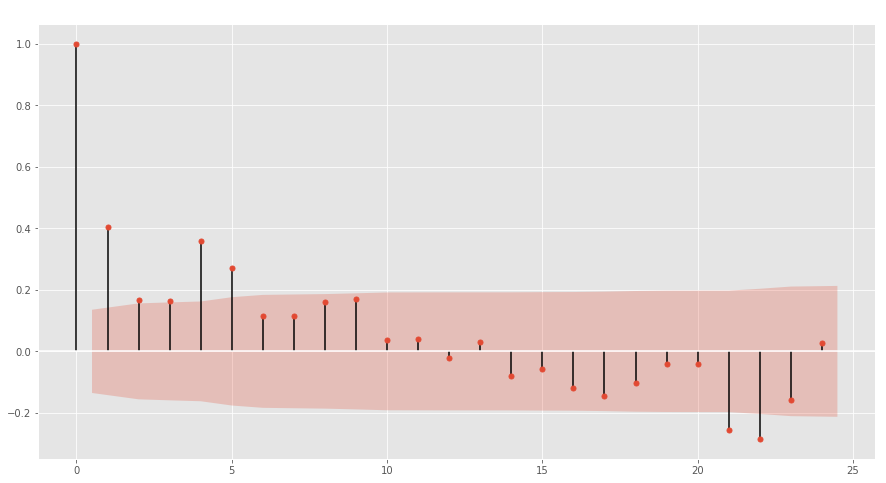

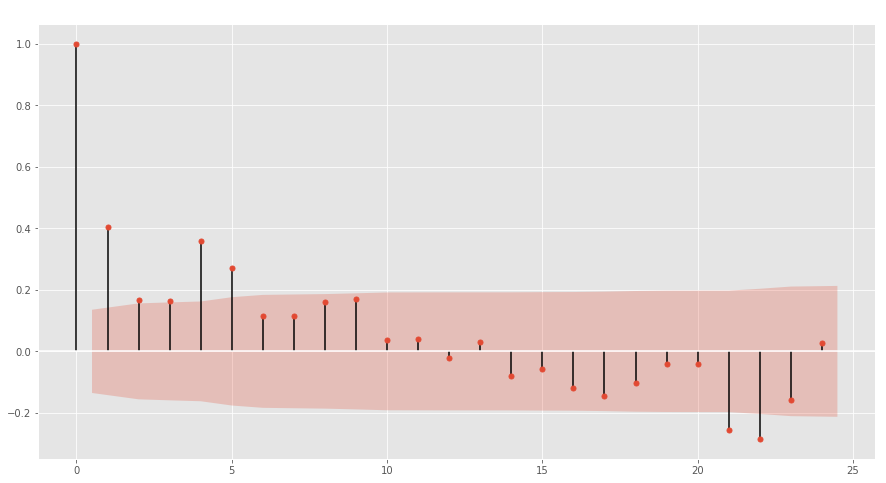

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('ggplot')
plot_acf(weekly_data)

Values till lag of 5 are strongly correlated as seen from the above ACF plot.

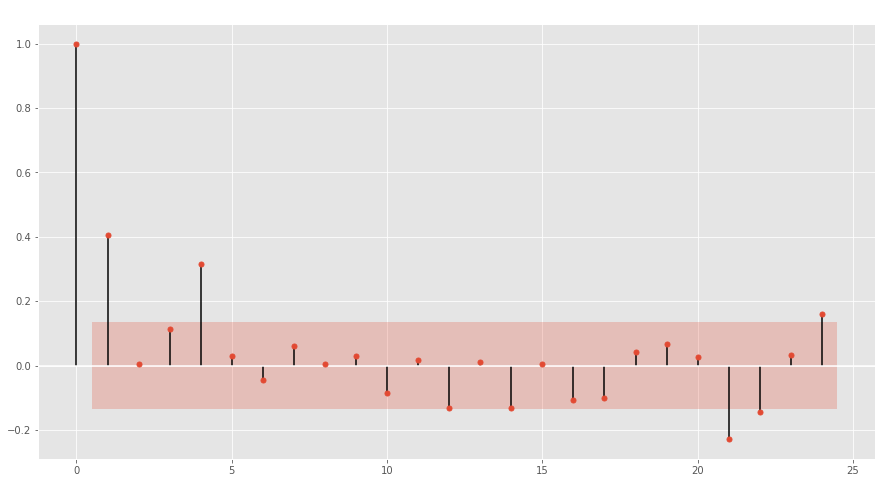

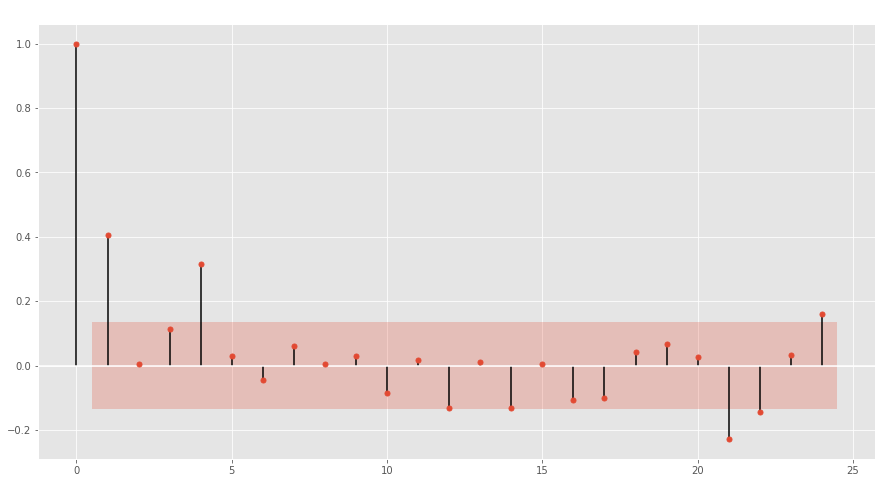

In [25]:
plot_pacf(weekly_data)

Values till lag of 1 are strongly correlated as seen from pacf plot.

In [26]:
# We use initial 80% data as train and remaining as test.
train_idx = int(len(weekly_data)*0.8)
print('Use initial',train_idx,'rows as train data.')

Use initial 168 rows as train data.


In [27]:
# ARIMA model
# split data
#train_idx = weekly_data[weekly_data['year']==2009].index[-1]
train_data, test_data = weekly_data[:train_idx], weekly_data[train_idx:]
#y_train, y_test = train_data.shift(1), test_data.shift(1)

In [28]:
import statsmodels.api as sm

In [29]:
model = sm.tsa.arima.ARIMA(train_data,order=(2,0,5), missing='drop')
model_fit = model.fit()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Global_active_power   No. Observations:                  168
Model:                  ARIMA(2, 0, 5)   Log Likelihood               -1548.547
Date:                 Thu, 31 Dec 2020   AIC                           3115.094
Time:                         17:35:28   BIC                           3143.210
Sample:                              0   HQIC                          3126.505
                                 - 168                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.103e+04    429.667     25.679      0.000    1.02e+04    1.19e+04
ar.L1          0.6205      0.976      0.636      0.525      -1.292       2.533
ar.L2          0.1661      0.878      0.189      0.850      -1.555       1.887
ma.L1         -0.2119      0.975     -0.217      0.828      -2.123       1.700
ma.L2         -0.3625      0.480     -0.755      0.450      -1.303       0.578
ma.L3         -0.1971      0.308     -0.640      0.522      -0.801       0.406
ma.L4          0.2544      0.151      1.685      0.092      -0.041       0.550
ma.L5          0.1381      0.297      0.465      0.642      -0.444       0.720
sigma2       5.08e+06   4.57e+05     11.122      0.000    4.18e+06    5.97e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.88   Prob(JB):                         0.43
Heteroskedasticity (H):               0.45   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#Predict future values for test data.
predicted_vals = model_fit.predict(start=train_idx, end=len(weekly_data)-1, dynamic=False)

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [32]:
test_df = pd.DataFrame(test_data).reset_index()
test_df['forecast'] = predicted_vals.reset_index()['predicted_mean']

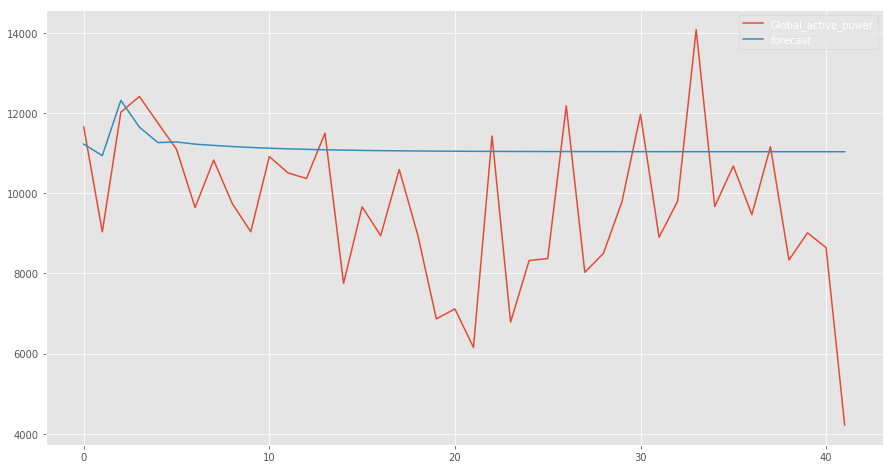

In [33]:
test_df[['Global_active_power','forecast']].plot()

Observation, the model is not much useful if we do not consider seasonality

In [34]:
# Including seasonality SARIMAX
sarimax_model = sm.tsa.statespace.SARIMAX(train_data,order=(2,0,4), seasonal_order=(2,0,4,52))
sarimax_model_fit = sarimax_model.fit()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


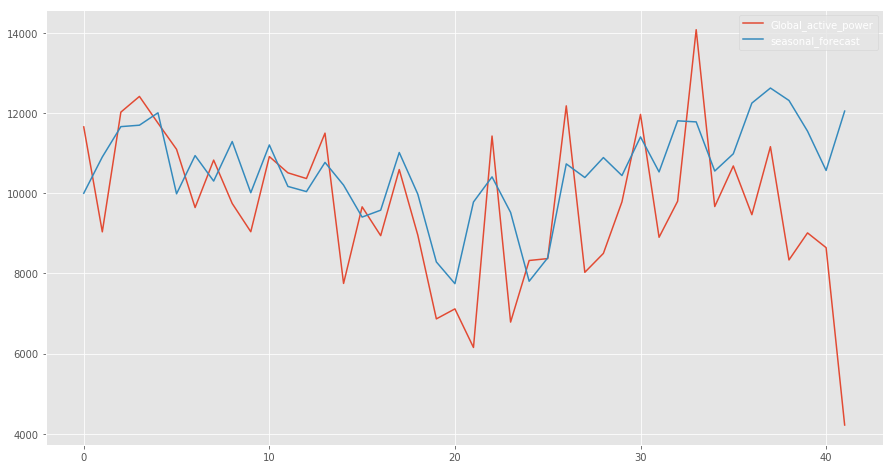

In [35]:
#Predict future values for test data.
predicted_vals = sarimax_model_fit.predict(start=train_idx, end=len(weekly_data)-1, dynamic=True)
test_df = pd.DataFrame(test_data).reset_index()
test_df['seasonal_forecast'] = predicted_vals.reset_index()['predicted_mean']
test_df[['Global_active_power','seasonal_forecast']].plot()

We see that we have less error comapred to the previous ARIMA model.

In [36]:
def calculate_rmse(true, predicted):
    sq_error = np.sum((true-predicted)**2)
    mse = sq_error/len(true)
    rmse = mse**0.5
    return rmse

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


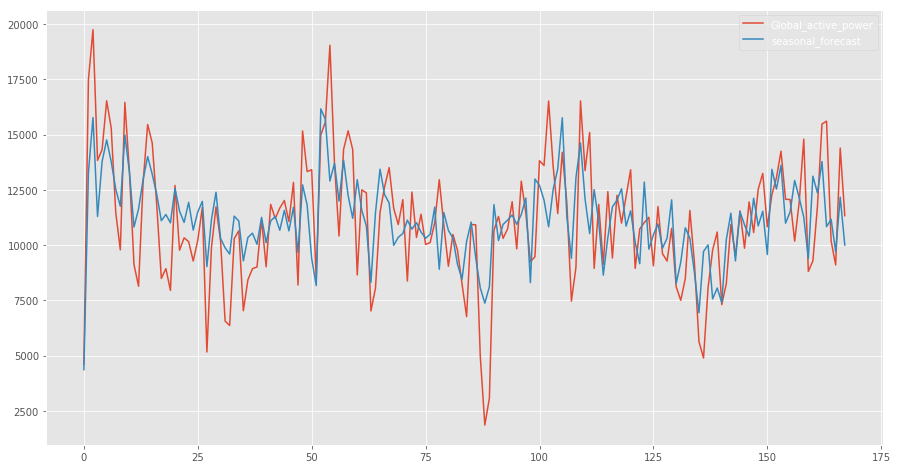

In [37]:
# Train Rmse
#Predict future values for train data.
predicted_vals = sarimax_model_fit.predict(start=1, end=train_idx, dynamic=False)
train_df = pd.DataFrame(train_data).reset_index()
train_df['seasonal_forecast'] = predicted_vals.reset_index()['predicted_mean']
train_df[['Global_active_power','seasonal_forecast']].plot()

In [38]:
# Train rmse
calculate_rmse(train_df['Global_active_power'],train_df['seasonal_forecast'])

2046.189703556369

In [39]:
# Test rmse
calculate_rmse(test_df['Global_active_power'], test_df['seasonal_forecast'])

2014.9264343879167